# WECC Congestion Analysis
Vicky Hunt, 9/3/19

(excerpt from WECC Paths Report): https://www.wecc.org/Reliability/TAS_PathReports_Combined_FINAL.pdf

Step 1 – Utilization Screening

The utilization screening is intended to capture any highly utilized or potentially congested paths in the TEPPC study cases. Any path with a U75 for 50 percent of the year, U90 for 20 percent of the year, or U99 for five percent of the year is analyzed further. A path is defined as being ‘highly utilized’ if it meets any one of these screening criteria.

Step 2 – Qualitative WECC Review

WECC qualitatively reviewed and screened out paths that showed congestion based on how the modeling was performed (e.g., localized congestion due to how new generation was added to the model that would not occur in reality). Paths that were screened out were not analyzed further but were tracked throughout the process and presented for stakeholder review. The only paths that screened out in this step were the SDG&E-CFE (Path 45) and Intermountain-to-Mona (Path 28) 345-kV Paths.

Step 3 – Conditional Congestion Score

The remaining paths were scored using two normalized metrics that quantify risk, and utilization. The sum of the normalized metrics makes up the Conditional Congestion Score. If a path passed the Utilization Screening for a particular case, it was given a Conditional Congestion Score.

1. The Risk metric is a summation of the flow along a path for all hours above U90 and is an indicator of how often the path is heavily loaded and how much energy could be at risk during these periods of heavy loading. This metric is shown on the Risk View of the dashboard.

2. The Utilization metric is simply U90 and provides a way to compare the utilization of paths regardless of size. This metric is shown on the Utilization View of the dashboard.

In previous discussions, there has been significant dialogue regarding the terms “utilization” and “congestion,” and their use. Utilization is a term that describes the extent to which the transmission line (path) is used. Congestion is a word to describe at what time a transmission line may be over utilized. For purposes of this communication, high utilization is defined as the times when path flows are above 75 percent of the path rating (U75). Congestion occurs when the path flows are above 90 percent of the path rating (U90).

In [1]:
import pandas as pd
import numpy as np
import csv
import pickle 

from postreise.analyze import transmission
from postreise.analyze import mapping
from postreise.analyze import distance

from powersimdata.scenario.scenario import Scenario
from postreise.process import transferdata
scenario = Scenario('WesternBase_2016_noHVDC_cost_fix_2016opt16')

c:\program files\python37\lib\site-packages\paramiko\ecdsakey.py:164: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.ecdsa_curve.curve_class(), pointinfo
c:\program files\python37\lib\site-packages\paramiko\kex_ecdh_nist.py:39: CryptographyDeprecationWarning: encode_point has been deprecated on EllipticCurvePublicNumbers and will be removed in a future version. Please use EllipticCurvePublicKey.public_bytes to obtain both compressed and uncompressed point encoding.
  m.add_string(self.Q_C.public_numbers().encode_point())
c:\program files\python37\lib\site-packages\paramiko\kex_ecdh_nist.py:96: CryptographyDeprecationWarning: Support for unsafe construction of public numbers from encoded data will be removed in a future version. Please use EllipticCurvePublicKey.from_encoded_point
  self.curve, Q_S_bytes
c:\program files\python37\lib\site-

SCENARIO: base | WesternBase_2016_noHVDC_cost_fix_2016opt16

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [8]:
from importlib import reload
reload(mapping)
reload(transmission)
cong_all, binding_df = transmission.generate_cong_stats(scenario)

--> Loading PF
Calculating utilization
Flaging congested branches
Calculating branch distance
make branch_map
flagging
start first maps
Mapping
Mapping all lines
Mapping binding:


In [11]:
cong_all

,capacity,branch_device_type,per_util1,per_util2,per_util3,bind,risk,uflag1,uflag2,uflag3,sumflag,dist
88209,185.33,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.451163
88210,167.88,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,66.287123
88211,207.43,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.686763
88212,170.67,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,15.263467
88213,201.54,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,21.817179
...,...,...,...,...,...,...,...,...,...,...,...,...
100910,660.89,Transformer,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
100911,266.40,TransformerWinding,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
100912,216.40,TransformerWinding,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
100913,184.70,Line,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.709100


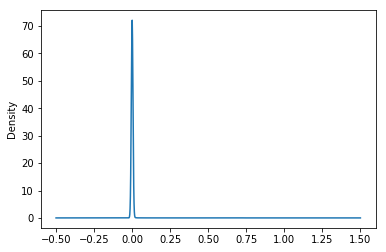

In [9]:
#kernel density plot
s = cong_all.per_util1
s.plot.kde()